**Importing relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing the test and train datasets**

In [2]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
train = train_original.copy()
test = test_original.copy()

**Data preprocessing**

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The feature 'MSSubClass' is a categorical variable. We observe that it is recorded as an integer. Hence, we have to convert it to a categorical variable. 

In [5]:
train['MSSubClass'] = train['MSSubClass'].astype('object')

In [6]:
test['MSSubClass'] = test['MSSubClass'].astype('object')

We can remove the 'Id' column as it is redundant

In [7]:
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

Additionally, we convert the 'MoSold' and 'YrSold' into categorical variables.

In [8]:
train['MoSold'] = train['MoSold'].astype('object')
test['MoSold'] = test['MoSold'].astype('object')
train['YrSold'] = train['YrSold'].astype('object')
test['YrSold'] = test['YrSold'].astype('object')

We now store the categorical and numerical variables in the train and test datasets in separate lists

In [9]:
cat_cols_train = []
num_cols_train = []
for i in train.columns:
    if train[i].dtypes == 'object':
        cat_cols_train.append(i)
    else:
        num_cols_train.append(i)

In [10]:
cat_cols_test = []
num_cols_test = []

for i in test.columns:
    if test[i].dtypes == 'object':
        cat_cols_test.append(i)
    else:
        num_cols_test.append(i)

Let's check out the distribution of the variable 'SalePrice'

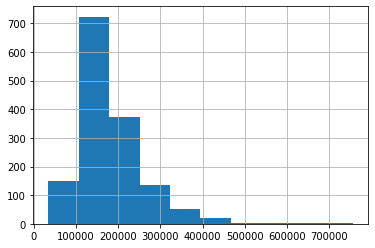

In [11]:
train['SalePrice'].hist()

We observe the distribution of Sale Prices is right-skewed. It approximately follows a log-normal distribution. Hence, we apply log-transformation to this data to make it as "normal" as possible.

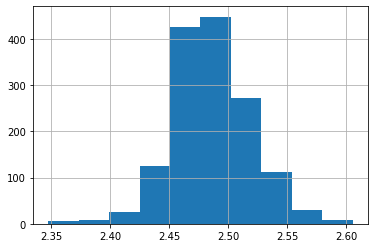

In [12]:
train['SalePrice'] = np.log(train['SalePrice'])
np.log(train['SalePrice']).hist()

**Exploratory Data Analysis**

Let us understand the distribution of the numerical variables

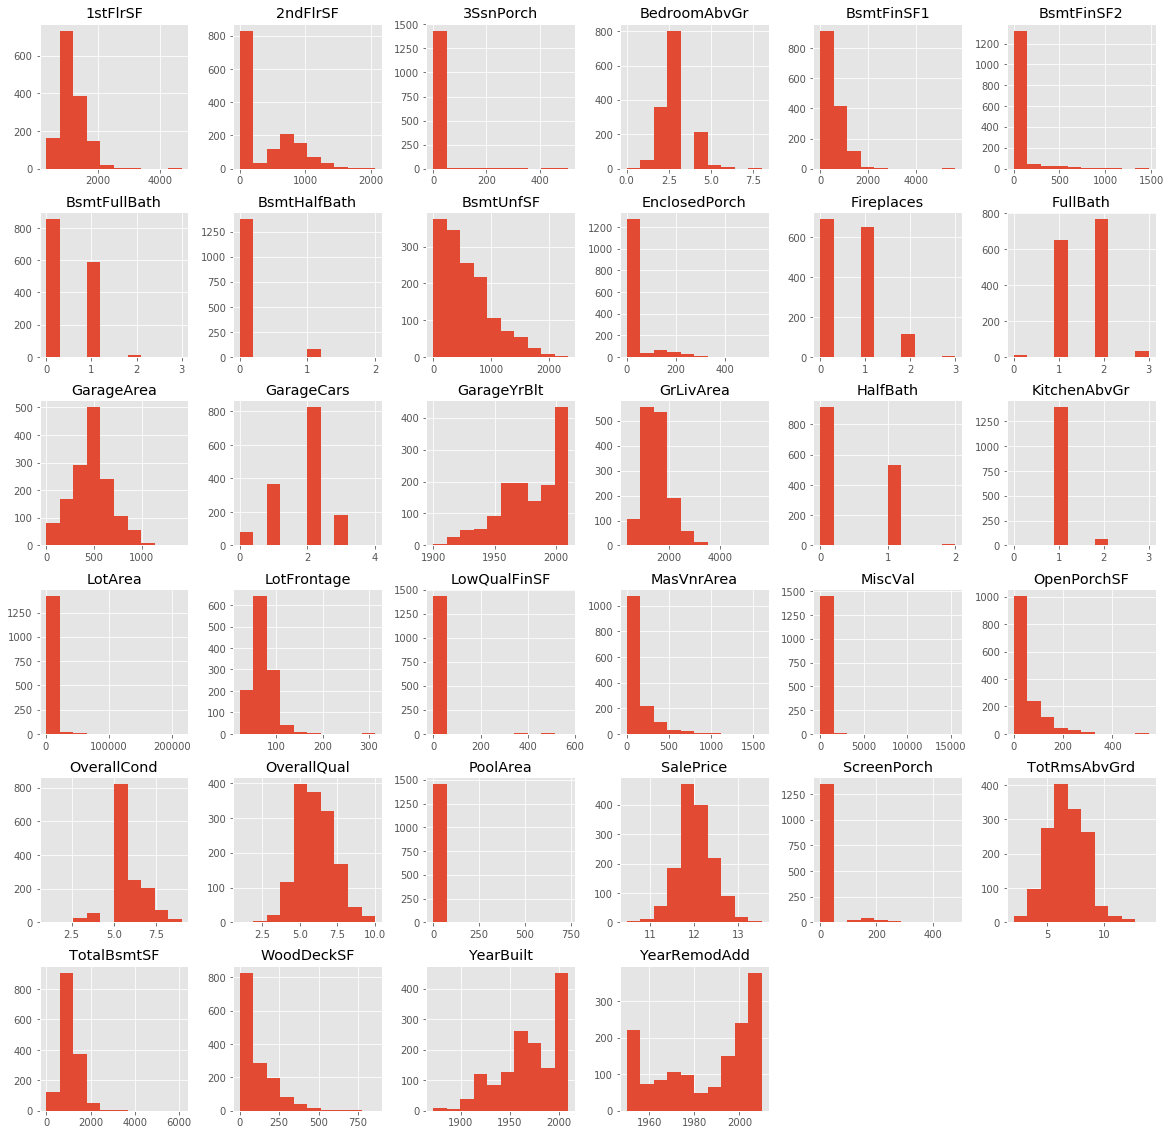

In [13]:
plt.style.use("ggplot")
train[num_cols_train].hist(figsize = (20,20))
plt.show()

We can notice:
* For most numerical variables, their scales vary widely. Hence, we need to standardize the data.
* The variables 'YearBuilt' and 'GarageYrBlt' are left skewed, which indicates more houses and garages are built in recent  years than earlier years. Hence, we will not check or treat any outliers in these variables.
* We also observe the variables '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LotArea', 'LowQualFinSF', 'MiscVal', 'PoolArea', and 'ScreenPorch' have overwhelming number of values close to 0. This means they actually may be significant in determining 'SalePrice'.
* Additionally, the variables 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtHalfBath', 'WoodDeckSF' and 'OpenPorchSF' are heavily right-skewed. 
* Let us check the descriptive values for these variables.

In [14]:
list1 = ['3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LotArea', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', \
         'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF']
desc1 = train[list1].describe().transpose()
desc1

,count,mean,std,min,25%,50%,75%,max
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.0,0.0,0.00,508.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.00,552.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.00,572.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.00,738.0
ScreenPorch,1460.0,15.060959,55.757415,0.0,0.0,0.0,0.00,480.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0


Calculate Coefficient of Variation = Standard Deviation / Mean

In [15]:
desc1['coeff_of_var'] = desc1['std']/desc1['mean']
desc1

,count,mean,std,min,25%,50%,75%,max,coeff_of_var
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.0,0.0,0.00,508.0,8.598494
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0,3.465556
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.00,552.0,2.783950
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0,0.949076
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.00,572.0,8.319430
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0,11.408001
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.00,738.0,14.562778
ScreenPorch,1460.0,15.060959,55.757415,0.0,0.0,0.0,0.00,480.0,3.702116
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0,1.746306
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0,1.028082


* We observe several variables with extremely high CV with very few non-zero values. These are variables with very high variability.
* While we typically include data with high variability, in this case we shall drop those variables whose upper quantile is 0 and the CV is above 3. These variables are treated as variables having a lot of missing values. It signifies that an overwhelming majority of houses in the training data do not have these features, and hence they are not good predictors in the model. 

In [16]:
desc1[desc1['coeff_of_var'] > 3].T.columns

Index(['3SsnPorch', 'BsmtFinSF2', 'LowQualFinSF', 'MiscVal', 'PoolArea',
       'ScreenPorch', 'BsmtHalfBath'],
      dtype='object')

In [17]:
dropped_columns = ['3SsnPorch', 'BsmtFinSF2', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', 'BsmtHalfBath']

In [18]:
train.drop(dropped_columns, axis = 1, inplace = True)
test.drop(dropped_columns, axis = 1, inplace = True)

**Create a final list of categorical and numerical variables**

In [19]:
cat_cols = []
num_cols = []
for i in test.columns:
    if test[i].dtypes == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [20]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [21]:
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch']

**Check for missing values**

*Let's check the categorical values first*

In [22]:
for i in train.columns:
    if train[i].isnull().sum() > 0:
        if train[i].dtypes == 'object':
            print(i)
            print('Total null values:', train[i].isnull().sum())
            print('Null values as a % of total:', round((train[i].isnull().sum() * 100) / train['SalePrice'].count(), 1))
            print()

Alley
Total null values: 1369
Null values as a % of total: 93.8

MasVnrType
Total null values: 8
Null values as a % of total: 0.5

BsmtQual
Total null values: 37
Null values as a % of total: 2.5

BsmtCond
Total null values: 37
Null values as a % of total: 2.5

BsmtExposure
Total null values: 38
Null values as a % of total: 2.6

BsmtFinType1
Total null values: 37
Null values as a % of total: 2.5

BsmtFinType2
Total null values: 38
Null values as a % of total: 2.6

Electrical
Total null values: 1
Null values as a % of total: 0.1

FireplaceQu
Total null values: 690
Null values as a % of total: 47.3

GarageType
Total null values: 81
Null values as a % of total: 5.5

GarageFinish
Total null values: 81
Null values as a % of total: 5.5

GarageQual
Total null values: 81
Null values as a % of total: 5.5

GarageCond
Total null values: 81
Null values as a % of total: 5.5

PoolQC
Total null values: 1453
Null values as a % of total: 99.5

Fence
Total null values: 1179
Null values as a % of total: 8

In [23]:
for i in test.columns:
    if test[i].isnull().sum() > 0:
        if test[i].dtypes == 'object':
            print(i)
            print('Total null values:', test[i].isnull().sum())
            print('Null values as a % of total:', round((test[i].isnull().sum() * 100) / train['SalePrice'].count(), 1))
            print()

MSZoning
Total null values: 4
Null values as a % of total: 0.3

Alley
Total null values: 1352
Null values as a % of total: 92.6

Utilities
Total null values: 2
Null values as a % of total: 0.1

Exterior1st
Total null values: 1
Null values as a % of total: 0.1

Exterior2nd
Total null values: 1
Null values as a % of total: 0.1

MasVnrType
Total null values: 16
Null values as a % of total: 1.1

BsmtQual
Total null values: 44
Null values as a % of total: 3.0

BsmtCond
Total null values: 45
Null values as a % of total: 3.1

BsmtExposure
Total null values: 44
Null values as a % of total: 3.0

BsmtFinType1
Total null values: 42
Null values as a % of total: 2.9

BsmtFinType2
Total null values: 42
Null values as a % of total: 2.9

KitchenQual
Total null values: 1
Null values as a % of total: 0.1

Functional
Total null values: 2
Null values as a % of total: 0.1

FireplaceQu
Total null values: 730
Null values as a % of total: 50.0

GarageType
Total null values: 76
Null values as a % of total: 5.2

Let's check the barplot of the categorical variables

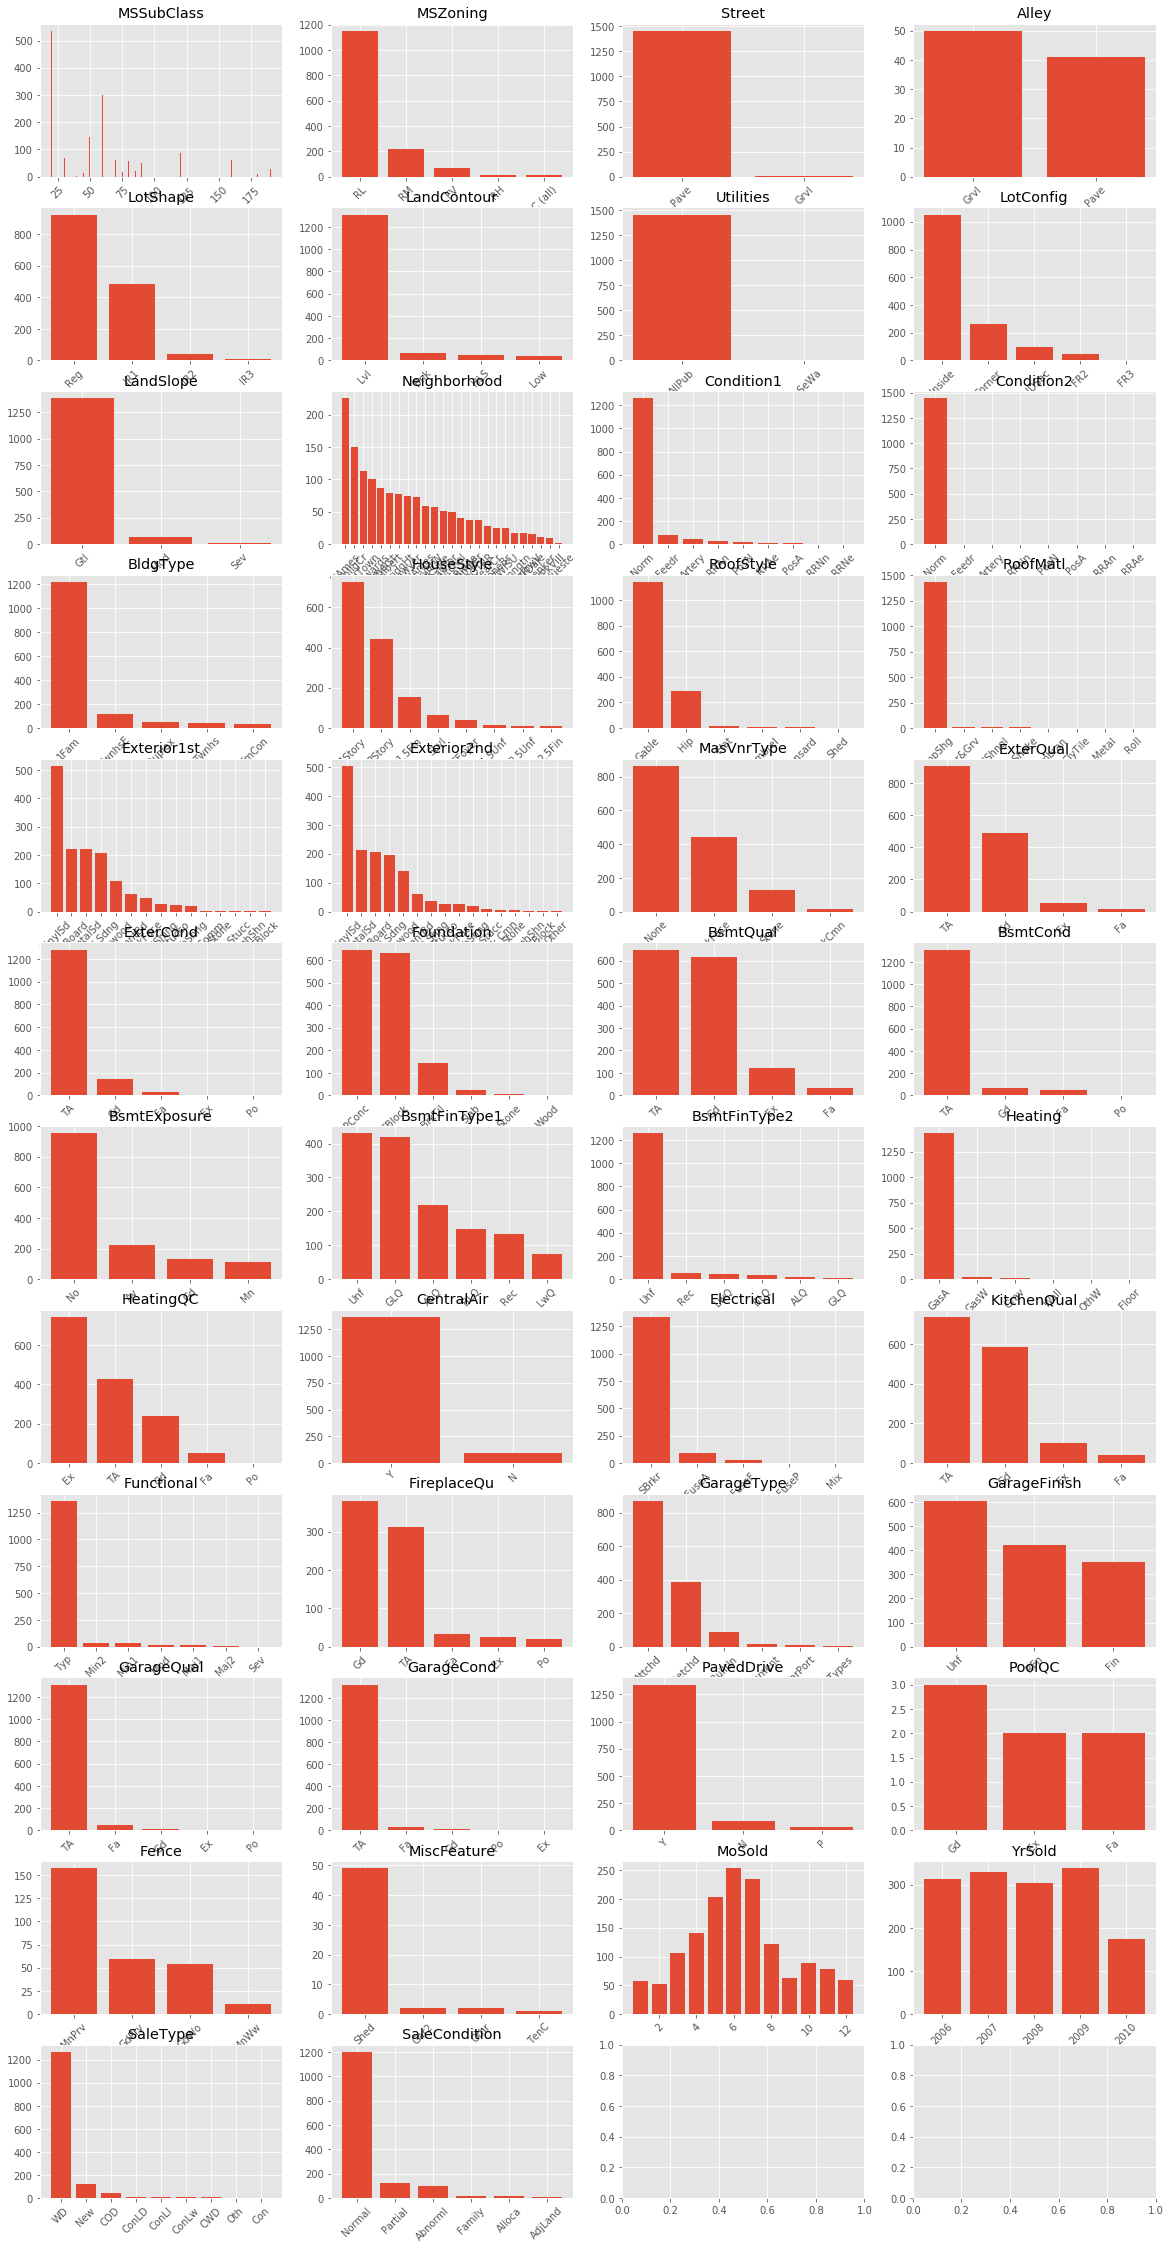

In [24]:
f, axes = plt.subplots(12, 4, figsize = (20, 40))
for ax, col in zip(axes.ravel(), cat_cols):
    y = train[col].value_counts()
    ax.bar(y.index, y)
    ax.set_title(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

* We observe that a few variables have an overwhelming number of missing values.
* Let's check those variables where missing values exceed 40%.

In [25]:
for i in train.columns:
    if train[i].dtypes == 'object':
        if train[i].isnull().sum() > 0:
            missing_value_perc = round((train[i].isnull().sum() * 100) / train['SalePrice'].count(), 1)
            if missing_value_perc > 40:
                print(i)
                print(train[i].value_counts())
                print('Total null values:', train[i].isnull().sum())
                print('Null values as a % of total:', round((train[i].isnull().sum() * 100) / train['SalePrice'].count(), 1))
                print()

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
Total null values: 1369
Null values as a % of total: 93.8

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Total null values: 690
Null values as a % of total: 47.3

PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Total null values: 1453
Null values as a % of total: 99.5

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Total null values: 1179
Null values as a % of total: 80.8

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
Total null values: 1406
Null values as a % of total: 96.3



We observe 2 scenarios:
* Either the houses do not have these attributes and hence their value has been left out.
* Or the houses have those attributes but their values have not been recorded.
However, it seems really rare that all houses will have all the 46 attributes. Hence, we can say those missing values actually signify 'Not Applicable', except 'PoolQC'. 'PoolQC' indicates Pool Quality, and not the presence of a pool in the house. Since there is another variable 'PoolArea' which records the area of pool in square feet, that variable is sufficient to record the presence of a pool in the house. As we have already dropped 'PoolArea', we can also drop the variable 'PoolQC'. 

In [26]:
train.drop('PoolQC', axis=1, inplace=True)
test.drop('PoolQC', axis=1, inplace=True)
dropped_columns.append('PoolQC')

Let's update the lists - cat_col, and num_col

In [27]:
cat_cols = []
cont_cols = []

for i in test.columns:
    if test[i].dtypes == 'object':
        cat_cols.append(i)
    else:
        cont_cols.append(i)

* The 4 features with missing values exceeding 40%: 'Alley', 'FireplaceQu', 'Fence', and 'MiscFeature', are features which record the presence of the attribute in the house. Hence, we'll fill the missing values in these variables with 'Not_Applicable'.
* For other features which have missing values, we observe the maximum percentage of missing values to be 5.5%, which is very small. Hence, we can assume that the houses in the dataset have these attributes, but they are not recorded in the dataset. Hence, we fill in the missing values with the most frequently occuring values as our best guess. 

In [28]:
list2 = ['Alley', 'FireplaceQu', 'Fence', 'MiscFeature']
for i in list2:
    train[i].fillna('Not Applicable', inplace = True)
    test[i].fillna('Not Applicable', inplace = True)

In [29]:
for i in cat_cols:
    if train[i].isnull().sum() > 0:
        train[i].fillna(train[i].value_counts().index[0], inplace = True)
        
for i in cat_cols:
    if test[i].isnull().sum() > 0:
        test[i].fillna(train[i].value_counts().index[0], inplace = True)

In [30]:
train[cat_cols].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [31]:
test[cat_cols].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

Now, let's check the numerical variables for missing values

In [32]:
for i in train.columns:
    if train[i].isnull().sum() > 0:
        if train[i].dtypes != 'object':
            print(i)
            print('Total null values:', train[i].isnull().sum())
            print('Null values as a % of total:', round((train[i].isnull().sum() * 100) / train['SalePrice'].count(), 1))
            print()

LotFrontage
Total null values: 259
Null values as a % of total: 17.7

MasVnrArea
Total null values: 8
Null values as a % of total: 0.5

GarageYrBlt
Total null values: 81
Null values as a % of total: 5.5



In [33]:
for i in test.columns:
    if test[i].isnull().sum() > 0:
        if test[i].dtypes != 'object':
            print(i)
            print('Total null values:', test[i].isnull().sum())
            print('Null values as a % of total:', round((test[i].isnull().sum() * 100) / train['SalePrice'].count(), 1))
            print()

LotFrontage
Total null values: 227
Null values as a % of total: 15.5

MasVnrArea
Total null values: 15
Null values as a % of total: 1.0

BsmtFinSF1
Total null values: 1
Null values as a % of total: 0.1

BsmtUnfSF
Total null values: 1
Null values as a % of total: 0.1

TotalBsmtSF
Total null values: 1
Null values as a % of total: 0.1

BsmtFullBath
Total null values: 2
Null values as a % of total: 0.1

GarageYrBlt
Total null values: 78
Null values as a % of total: 5.3

GarageCars
Total null values: 1
Null values as a % of total: 0.1

GarageArea
Total null values: 1
Null values as a % of total: 0.1



We will fill the missing values in the training dataset by the median value of their feature since the percentage of missing values is small.

In [34]:
for i in cont_cols:
    if train[i].isnull().sum() > 0:
        train[i].fillna(train[i].median(), inplace = True)

In [35]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

In [36]:
for i in cont_cols:
    if test[i].isnull().sum() > 0:
        test[i].fillna(test[i].median(), inplace = True)

In [37]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

Now, we have no missing values in the data.

**Correlation matrix heatmap**

TypeError: heatmap() missing 1 required positional argument: 'data'

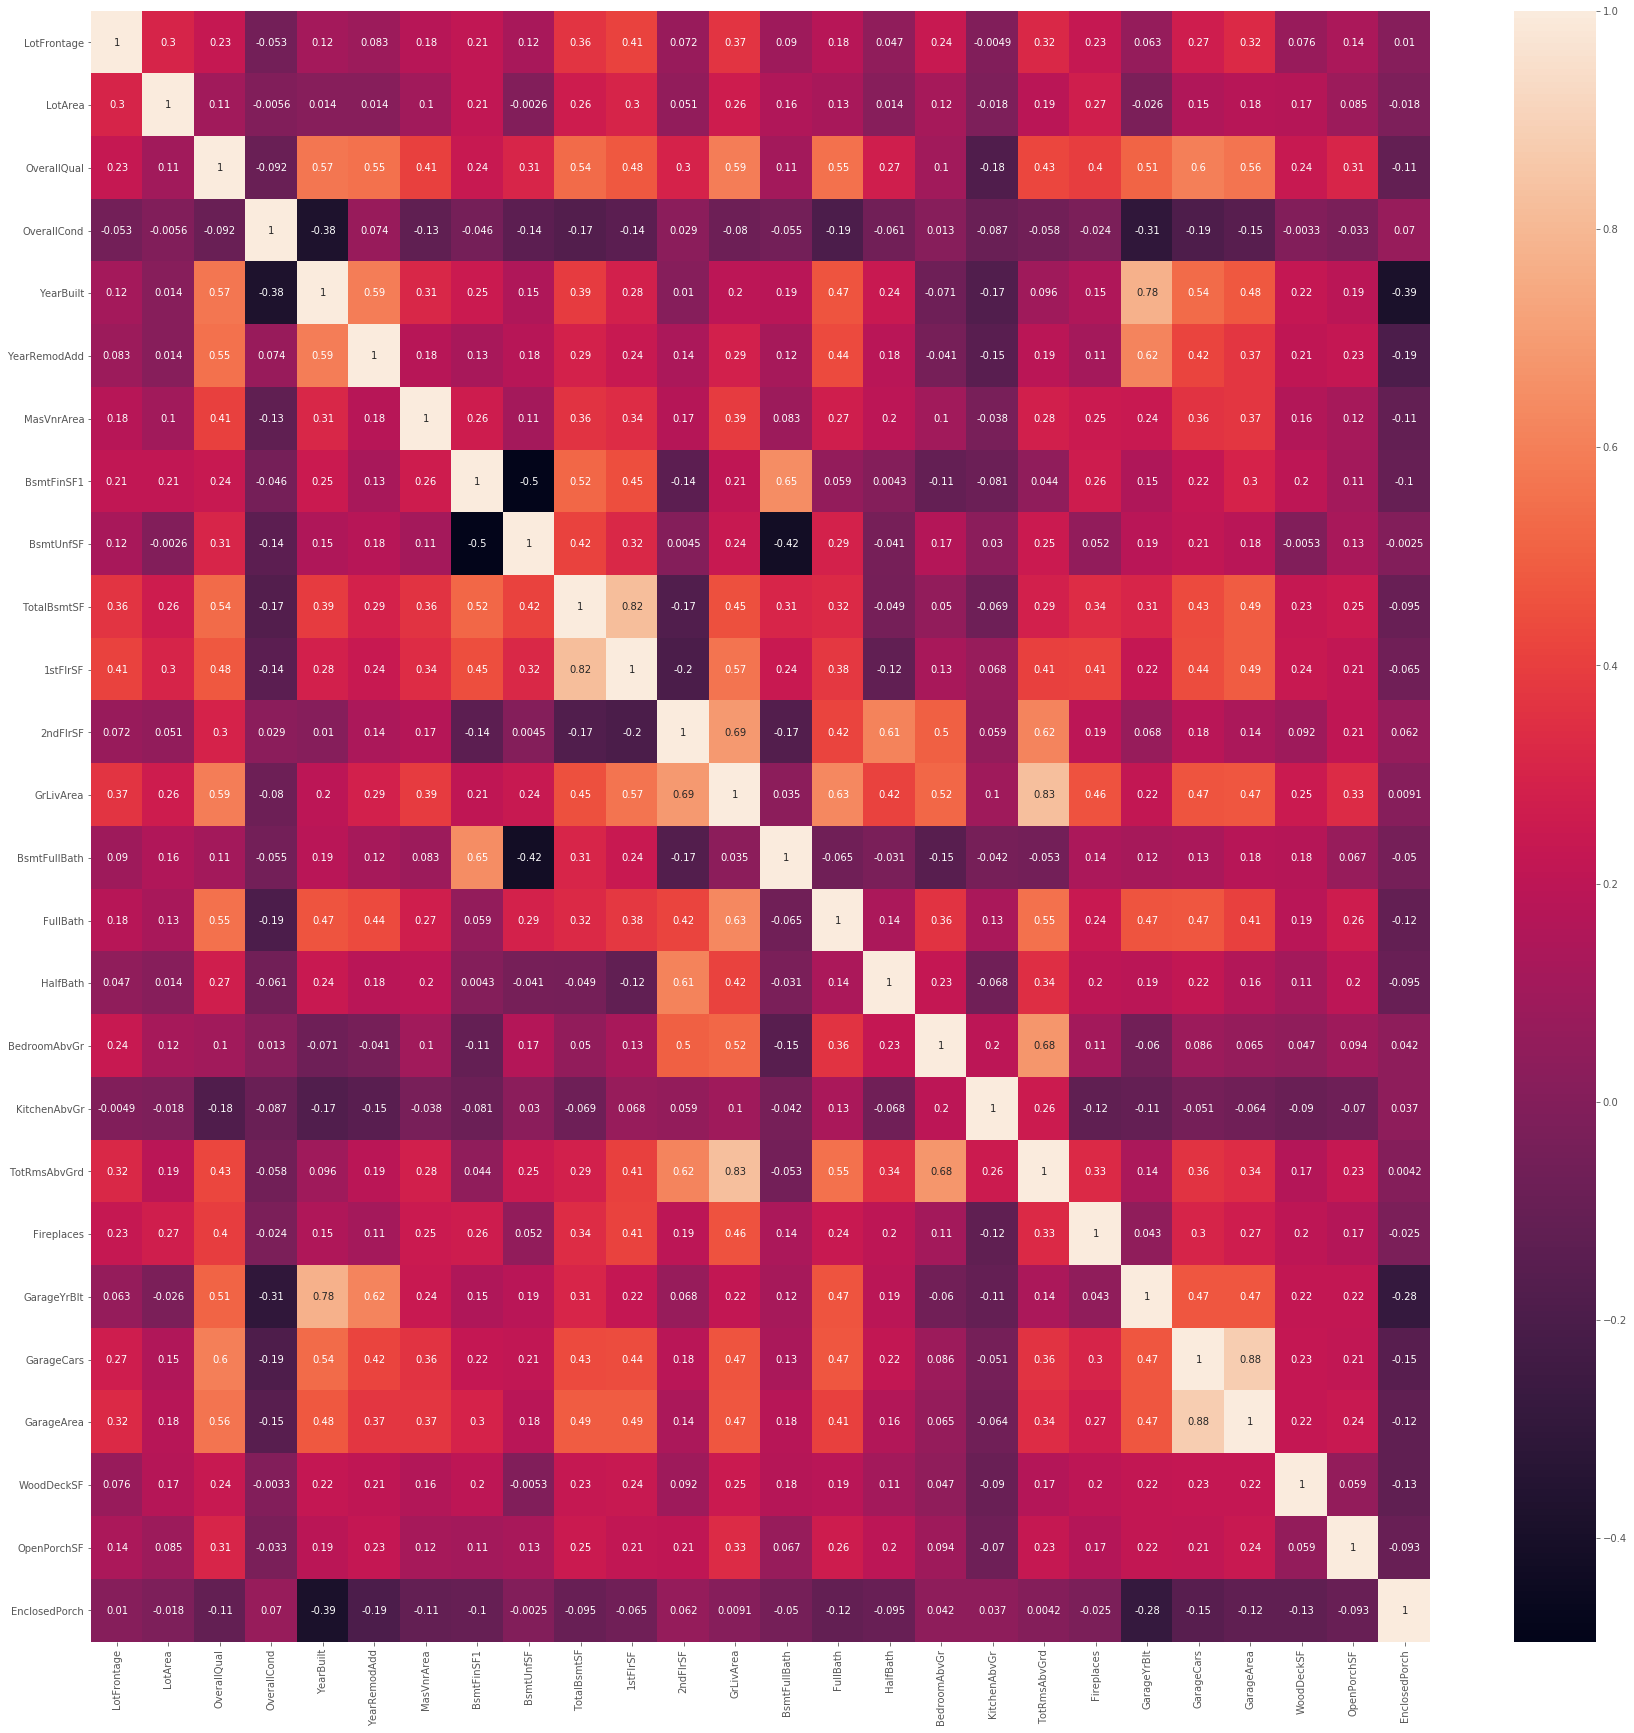

In [38]:
plt.figure(figsize = (30,30))
sns.heatmap(train.drop(['SalePrice'], axis = 1).corr(), annot = True)
sns.heatmap()

Generally, we do not observe high correlation among the features. There are only 4 instances of correlation being greater than 0.8. Hence, we choose to retain all the features in the regression.

**Scaling the numerical variables**

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
scaled_features = train.copy()
scaled_train = scaled_features[num_cols]
scaled_train = scalar.fit_transform(scaled_train)

In [41]:
df_tr = train.copy()
df_tr[num_cols] = scaled_train

In [42]:
scaled_features_test = test.copy()
scaled_test = scaled_features_test[num_cols]
scaled_test = scalar.fit_transform(scaled_test)

In [43]:
df_test = test.copy()
df_test[num_cols] = scaled_test

**One Hot Encoding / Dummy Encoding of categorical variables**

In [44]:
df_tr_encoded = pd.get_dummies(df_tr, drop_first = True, columns = cat_cols)
df_test_encoded = pd.get_dummies(df_test, drop_first = True, columns = cat_cols)
df_tr_encoded.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not Applicable,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Applicable,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Applicable,MiscFeature_Not Applicable,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_C

**Remove special characters from column names to make them more conducive for analysis**

In [45]:
df_tr_encoded.columns = df_tr_encoded.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').\
str.replace('%', 'perc').str.replace('/', '_').str.replace('-', '_').str.replace('.', 'p').str.replace('[', '_').\
str.replace(']', '_').str.replace('&', '').str.replace('$', '').str.replace('#', '')
df_test_encoded.columns = df_test_encoded.columns.str.strip().str.replace(' ', '_').str.replace('(', '').\
str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_').str.replace('-', '_').str.replace('.', 'p').\
str.replace('[', '_').str.replace(']', '_').str.replace('&', '').str.replace('$', '').str.replace('#', '')

**Checking compatability between train and test data**

Since we have separate training and test datasets, we must ensure whether the values in categorical variables in the train and test datasets are the same. If not, the model will not run on the test dataset.

In [46]:
train_columns = df_tr_encoded.columns
train_columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [47]:
test_columns = df_test_encoded.columns
test_columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

The training dataset has more columns than the test dataset. It means a lot of variables in the train dataset are not included in the test dataset, and vice-versa could also be possible.

In [48]:
train_col_list = df_tr_encoded.columns.sort_values()
test_col_list = df_test_encoded.columns.sort_values()

**List of columns present in both datasets**

In [49]:
compatible_list = set(train_col_list).intersection(test_col_list)
df_tr_encoded_2 = df_tr_encoded[compatible_list]
df_tr_encoded_2.head()

,Alley_Not_Applicable,BsmtFinType2_LwQ,Electrical_FuseP,Neighborhood_Sawyer,OverallCond,ExterCond_Po,CentralAir_Y,Exterior1st_CBlock,LotArea,HeatingQC_TA,BsmtQual_Gd,SaleCondition_Family,Fence_Not_Applicable,FireplaceQu_Not_Applicable,MasVnrArea,Condition2_Norm,SaleType_ConLD,SaleType_Con,KitchenQual_Fa,MoSold_12,BsmtCond_Gd,LotConfig_FR2,Exterior2nd_Wd_Shng,BsmtFinSF1,MSSubClass_120,GarageFinish_Unf,HeatingQC_Fa,ExterCond_TA,Neighborhood_ClearCr,GarageFinish_RFn,BsmtCond_TA,Fence_GdWo,Neighborhood_NridgHt,MoSold_11,SaleCondition_Alloca,Exterior1st_HdBoard,Exterior2nd_HdBoard,Fireplaces,Exterior2nd_Brk_Cmn,Fence_MnWw,Functional_Maj2,GarageCond_Gd,Alley_Pave,HouseStyle_SFoyer,BsmtExposure_Gd,MoSold_10,MSSubClass_50,SaleType_WD,BsmtExposure_No,Fence_MnPrv,RoofStyle_Mansard,Exterior1st_CemntBd,YrSold_2008,Condition1_RRAn,RoofMatl_WdShngl,BldgType_2fmCon,FireplaceQu_Gd,SaleType_Oth,BsmtCond_Po,Exterior2nd_AsphShn,OpenPorchSF,Neighborhood_NWAmes,YrSold_2009,LotConfig_FR3,HalfBath,HouseStyle_1p5Unf,MiscFeature_Othr,MSSubClass_45,LotShape_Reg,ExterCond_Gd,Condition1_Norm,KitchenAbvGr,MSSubClass_60,SaleType_ConLI,Exterior2nd_Stone,GarageCond_Po,MasVnrType_None,BedroomAbvGr,Exterior1st_Plywood,Condition1_RRAe,Exterior2nd_Plywood,MSZoning_RH,Neighborhood_Veenker,BsmtQual_TA,MoSold_2,MoSold_9,LotFrontage,Neighborhood_Somerst,Condition1_Feedr,GrLivArea,GarageType_BuiltIn,LotShape_IR3,FireplaceQu_TA,SaleType_CWD,BsmtFinType1_LwQ,OverallQual,Neighborhood_SawyerW,YrSold_2007,RoofMatl_WdShake,Exterior1st_BrkComm,SaleCondition_Partial,Foundation_Wood,Condition2_PosA,ExterCond_Fa,Neighborhood_CollgCr,Exterior2nd_CBlock,SaleCondition_AdjLand,BldgType_Duplex,BsmtFinType1_GLQ,PavedDrive_P,YearBuilt,GarageCars,BldgType_TwnhsE,GarageQual_Gd,Exterior1st_MetalSd,Heating_GasW,BsmtFinType2_GLQ,1stFlrSF,FireplaceQu_Fa,MSSubClass_160,MSSubClass_80,HeatingQC_Po,RoofStyle_Shed,MSSubClass_75,Functional_Min1,HouseStyle_2p5Unf,BldgType_Twnhs,Exterior2nd_ImStucc,GarageQual_TA,Neighborhood_Edwards,MoSold_5,Heating_Wall,LotConfig_CulDSac,Neighborhood_BrkSide,Exterior1st_VinylSd,RoofMatl_TarGrv,Foundation_Stone,MSSubClass_190,HouseStyle_1Story,Condition1_RRNn,YrSold_2010,GarageType_CarPort,MSSubClass_70,MSSubClass_180,Condition1_PosA,MiscFeature_Not_Applicable,Neighborhood_OldTown,RoofStyle_Gable,LandContour_HLS,SaleType_New,BsmtQual_Fa,WoodDeckSF,GarageQual_Po,GarageYrBlt,Neighborhood_IDOTRR,BsmtFinType2_Rec,Exterior1st_BrkFace,Neighborhood_Blueste,ExterQual_TA,Heating_Grav,Foundation_Slab,Functional_Typ,GarageArea,GarageCond_TA,Exterior2nd_VinylSd,HouseStyle_SLvl,KitchenQual_TA,Neighborhood_NAmes,GarageType_Attchd,TotRmsAbvGrd,MSSubClass_40,Neighborhood_BrDale,MSSubClass_85,MiscFeature_Shed,MasVnrType_BrkFace,Exterior1st_WdShing,RoofStyle_Hip,Functional_Sev,Neighborhood_StoneBr,BsmtFinType1_BLQ,2ndFlrSF,Exterior2nd_Stucco,BsmtFinType1_Unf,Neighborhood_MeadowV,Exterior2nd_BrkFace,FullBath,Exterior1st_AsphShn,Condition1_PosN,GarageCond_Fa,MoSold_4,LandSlope_Sev,HouseStyle_2Story,BsmtUnfSF,LotShape_IR2,Foundation_PConc,GarageType_Basment,MoSold_8,FireplaceQu_Po,HeatingQC_Gd,MoSold_3,SaleCondition_Normal,EnclosedPorch,SaleType_ConLw,Foundation_CBlock,Street_Pave,LandContour_Low,LotConfig_Inside,GarageType_Detchd,MoSold_7,MSZoning_FV,YearRemodAdd,Neighborhood_Timber,Exterior1st_Wd_Sdng,LandContour_Lvl,Neighborhood_NPkVill,Condition2_Feedr,Exterior2nd_CmentBd,Neighborhood_SWISU,MasVnrType_Stone,PavedDrive_Y,Exterior1st_Stucco,MSZoning_RM,Functional_Min2,MoSold_6,BsmtFinType2_BLQ,Condition1_RRNe,Functional_Mod,RoofStyle_Gambrel,BsmtExposure_Mn,BsmtFinType2_Unf,Exterior2nd_Wd_Sdng,KitchenQual_Gd,MSSubClass_90,Neighborhood_NoRidge,LandSlope_Mod,TotalBsmtSF,Neighborhood_Gilbert,BsmtFullBath,MSZoning_RL,ExterQual_Gd,Neighborhood_Crawfor,Condition2_PosN,ExterQual_Fa,MSSubClass_30,Exterior2nd_MetalSd,Neighborhood_Mitchel,BsmtFinType1_Rec,Electrical_FuseF,Electrical_SBrkr
0,1,0,0,0,-0.517200,0,1,0,-0.207142,0,1,0,1,1,0.514104,1,0,0,0,0,0,0,0,0.575425,0,0,0,1,0,1,1,0,0,0,0,0,0

In [50]:
df_test_encoded_2 = df_test_encoded[compatible_list]
df_test_encoded_2.shape
df_test_encoded_2.head()

,Alley_Not_Applicable,BsmtFinType2_LwQ,Electrical_FuseP,Neighborhood_Sawyer,OverallCond,ExterCond_Po,CentralAir_Y,Exterior1st_CBlock,LotArea,HeatingQC_TA,BsmtQual_Gd,SaleCondition_Family,Fence_Not_Applicable,FireplaceQu_Not_Applicable,MasVnrArea,Condition2_Norm,SaleType_ConLD,SaleType_Con,KitchenQual_Fa,MoSold_12,BsmtCond_Gd,LotConfig_FR2,Exterior2nd_Wd_Shng,BsmtFinSF1,MSSubClass_120,GarageFinish_Unf,HeatingQC_Fa,ExterCond_TA,Neighborhood_ClearCr,GarageFinish_RFn,BsmtCond_TA,Fence_GdWo,Neighborhood_NridgHt,MoSold_11,SaleCondition_Alloca,Exterior1st_HdBoard,Exterior2nd_HdBoard,Fireplaces,Exterior2nd_Brk_Cmn,Fence_MnWw,Functional_Maj2,GarageCond_Gd,Alley_Pave,HouseStyle_SFoyer,BsmtExposure_Gd,MoSold_10,MSSubClass_50,SaleType_WD,BsmtExposure_No,Fence_MnPrv,RoofStyle_Mansard,Exterior1st_CemntBd,YrSold_2008,Condition1_RRAn,RoofMatl_WdShngl,BldgType_2fmCon,FireplaceQu_Gd,SaleType_Oth,BsmtCond_Po,Exterior2nd_AsphShn,OpenPorchSF,Neighborhood_NWAmes,YrSold_2009,LotConfig_FR3,HalfBath,HouseStyle_1p5Unf,MiscFeature_Othr,MSSubClass_45,LotShape_Reg,ExterCond_Gd,Condition1_Norm,KitchenAbvGr,MSSubClass_60,SaleType_ConLI,Exterior2nd_Stone,GarageCond_Po,MasVnrType_None,BedroomAbvGr,Exterior1st_Plywood,Condition1_RRAe,Exterior2nd_Plywood,MSZoning_RH,Neighborhood_Veenker,BsmtQual_TA,MoSold_2,MoSold_9,LotFrontage,Neighborhood_Somerst,Condition1_Feedr,GrLivArea,GarageType_BuiltIn,LotShape_IR3,FireplaceQu_TA,SaleType_CWD,BsmtFinType1_LwQ,OverallQual,Neighborhood_SawyerW,YrSold_2007,RoofMatl_WdShake,Exterior1st_BrkComm,SaleCondition_Partial,Foundation_Wood,Condition2_PosA,ExterCond_Fa,Neighborhood_CollgCr,Exterior2nd_CBlock,SaleCondition_AdjLand,BldgType_Duplex,BsmtFinType1_GLQ,PavedDrive_P,YearBuilt,GarageCars,BldgType_TwnhsE,GarageQual_Gd,Exterior1st_MetalSd,Heating_GasW,BsmtFinType2_GLQ,1stFlrSF,FireplaceQu_Fa,MSSubClass_160,MSSubClass_80,HeatingQC_Po,RoofStyle_Shed,MSSubClass_75,Functional_Min1,HouseStyle_2p5Unf,BldgType_Twnhs,Exterior2nd_ImStucc,GarageQual_TA,Neighborhood_Edwards,MoSold_5,Heating_Wall,LotConfig_CulDSac,Neighborhood_BrkSide,Exterior1st_VinylSd,RoofMatl_TarGrv,Foundation_Stone,MSSubClass_190,HouseStyle_1Story,Condition1_RRNn,YrSold_2010,GarageType_CarPort,MSSubClass_70,MSSubClass_180,Condition1_PosA,MiscFeature_Not_Applicable,Neighborhood_OldTown,RoofStyle_Gable,LandContour_HLS,SaleType_New,BsmtQual_Fa,WoodDeckSF,GarageQual_Po,GarageYrBlt,Neighborhood_IDOTRR,BsmtFinType2_Rec,Exterior1st_BrkFace,Neighborhood_Blueste,ExterQual_TA,Heating_Grav,Foundation_Slab,Functional_Typ,GarageArea,GarageCond_TA,Exterior2nd_VinylSd,HouseStyle_SLvl,KitchenQual_TA,Neighborhood_NAmes,GarageType_Attchd,TotRmsAbvGrd,MSSubClass_40,Neighborhood_BrDale,MSSubClass_85,MiscFeature_Shed,MasVnrType_BrkFace,Exterior1st_WdShing,RoofStyle_Hip,Functional_Sev,Neighborhood_StoneBr,BsmtFinType1_BLQ,2ndFlrSF,Exterior2nd_Stucco,BsmtFinType1_Unf,Neighborhood_MeadowV,Exterior2nd_BrkFace,FullBath,Exterior1st_AsphShn,Condition1_PosN,GarageCond_Fa,MoSold_4,LandSlope_Sev,HouseStyle_2Story,BsmtUnfSF,LotShape_IR2,Foundation_PConc,GarageType_Basment,MoSold_8,FireplaceQu_Po,HeatingQC_Gd,MoSold_3,SaleCondition_Normal,EnclosedPorch,SaleType_ConLw,Foundation_CBlock,Street_Pave,LandContour_Low,LotConfig_Inside,GarageType_Detchd,MoSold_7,MSZoning_FV,YearRemodAdd,Neighborhood_Timber,Exterior1st_Wd_Sdng,LandContour_Lvl,Neighborhood_NPkVill,Condition2_Feedr,Exterior2nd_CmentBd,Neighborhood_SWISU,MasVnrType_Stone,PavedDrive_Y,Exterior1st_Stucco,MSZoning_RM,Functional_Min2,MoSold_6,BsmtFinType2_BLQ,Condition1_RRNe,Functional_Mod,RoofStyle_Gambrel,BsmtExposure_Mn,BsmtFinType2_Unf,Exterior2nd_Wd_Sdng,KitchenQual_Gd,MSSubClass_90,Neighborhood_NoRidge,LandSlope_Mod,TotalBsmtSF,Neighborhood_Gilbert,BsmtFullBath,MSZoning_RL,ExterQual_Gd,Neighborhood_Crawfor,Condition2_PosN,ExterQual_Fa,MSSubClass_30,Exterior2nd_MetalSd,Neighborhood_Mitchel,BsmtFinType1_Rec,Electrical_FuseF,Electrical_SBrkr
0,1,1,0,0,0.400766,0,1,0,0.363929,1,0,0,0,1,-0.563316,1,0,0,0,0,0,0,0,0.063428,0,1,0,1,0,0,1,0,0,0,0,0,0,

Now the test and train dataframes are perfectly compatible.

**Creating a feature set (X) and outcome variable (Y)**

In [51]:
X = df_tr_encoded_2
Y = df_tr_encoded['SalePrice']

In [52]:
X.head()

,Alley_Not_Applicable,BsmtFinType2_LwQ,Electrical_FuseP,Neighborhood_Sawyer,OverallCond,ExterCond_Po,CentralAir_Y,Exterior1st_CBlock,LotArea,HeatingQC_TA,BsmtQual_Gd,SaleCondition_Family,Fence_Not_Applicable,FireplaceQu_Not_Applicable,MasVnrArea,Condition2_Norm,SaleType_ConLD,SaleType_Con,KitchenQual_Fa,MoSold_12,BsmtCond_Gd,LotConfig_FR2,Exterior2nd_Wd_Shng,BsmtFinSF1,MSSubClass_120,GarageFinish_Unf,HeatingQC_Fa,ExterCond_TA,Neighborhood_ClearCr,GarageFinish_RFn,BsmtCond_TA,Fence_GdWo,Neighborhood_NridgHt,MoSold_11,SaleCondition_Alloca,Exterior1st_HdBoard,Exterior2nd_HdBoard,Fireplaces,Exterior2nd_Brk_Cmn,Fence_MnWw,Functional_Maj2,GarageCond_Gd,Alley_Pave,HouseStyle_SFoyer,BsmtExposure_Gd,MoSold_10,MSSubClass_50,SaleType_WD,BsmtExposure_No,Fence_MnPrv,RoofStyle_Mansard,Exterior1st_CemntBd,YrSold_2008,Condition1_RRAn,RoofMatl_WdShngl,BldgType_2fmCon,FireplaceQu_Gd,SaleType_Oth,BsmtCond_Po,Exterior2nd_AsphShn,OpenPorchSF,Neighborhood_NWAmes,YrSold_2009,LotConfig_FR3,HalfBath,HouseStyle_1p5Unf,MiscFeature_Othr,MSSubClass_45,LotShape_Reg,ExterCond_Gd,Condition1_Norm,KitchenAbvGr,MSSubClass_60,SaleType_ConLI,Exterior2nd_Stone,GarageCond_Po,MasVnrType_None,BedroomAbvGr,Exterior1st_Plywood,Condition1_RRAe,Exterior2nd_Plywood,MSZoning_RH,Neighborhood_Veenker,BsmtQual_TA,MoSold_2,MoSold_9,LotFrontage,Neighborhood_Somerst,Condition1_Feedr,GrLivArea,GarageType_BuiltIn,LotShape_IR3,FireplaceQu_TA,SaleType_CWD,BsmtFinType1_LwQ,OverallQual,Neighborhood_SawyerW,YrSold_2007,RoofMatl_WdShake,Exterior1st_BrkComm,SaleCondition_Partial,Foundation_Wood,Condition2_PosA,ExterCond_Fa,Neighborhood_CollgCr,Exterior2nd_CBlock,SaleCondition_AdjLand,BldgType_Duplex,BsmtFinType1_GLQ,PavedDrive_P,YearBuilt,GarageCars,BldgType_TwnhsE,GarageQual_Gd,Exterior1st_MetalSd,Heating_GasW,BsmtFinType2_GLQ,1stFlrSF,FireplaceQu_Fa,MSSubClass_160,MSSubClass_80,HeatingQC_Po,RoofStyle_Shed,MSSubClass_75,Functional_Min1,HouseStyle_2p5Unf,BldgType_Twnhs,Exterior2nd_ImStucc,GarageQual_TA,Neighborhood_Edwards,MoSold_5,Heating_Wall,LotConfig_CulDSac,Neighborhood_BrkSide,Exterior1st_VinylSd,RoofMatl_TarGrv,Foundation_Stone,MSSubClass_190,HouseStyle_1Story,Condition1_RRNn,YrSold_2010,GarageType_CarPort,MSSubClass_70,MSSubClass_180,Condition1_PosA,MiscFeature_Not_Applicable,Neighborhood_OldTown,RoofStyle_Gable,LandContour_HLS,SaleType_New,BsmtQual_Fa,WoodDeckSF,GarageQual_Po,GarageYrBlt,Neighborhood_IDOTRR,BsmtFinType2_Rec,Exterior1st_BrkFace,Neighborhood_Blueste,ExterQual_TA,Heating_Grav,Foundation_Slab,Functional_Typ,GarageArea,GarageCond_TA,Exterior2nd_VinylSd,HouseStyle_SLvl,KitchenQual_TA,Neighborhood_NAmes,GarageType_Attchd,TotRmsAbvGrd,MSSubClass_40,Neighborhood_BrDale,MSSubClass_85,MiscFeature_Shed,MasVnrType_BrkFace,Exterior1st_WdShing,RoofStyle_Hip,Functional_Sev,Neighborhood_StoneBr,BsmtFinType1_BLQ,2ndFlrSF,Exterior2nd_Stucco,BsmtFinType1_Unf,Neighborhood_MeadowV,Exterior2nd_BrkFace,FullBath,Exterior1st_AsphShn,Condition1_PosN,GarageCond_Fa,MoSold_4,LandSlope_Sev,HouseStyle_2Story,BsmtUnfSF,LotShape_IR2,Foundation_PConc,GarageType_Basment,MoSold_8,FireplaceQu_Po,HeatingQC_Gd,MoSold_3,SaleCondition_Normal,EnclosedPorch,SaleType_ConLw,Foundation_CBlock,Street_Pave,LandContour_Low,LotConfig_Inside,GarageType_Detchd,MoSold_7,MSZoning_FV,YearRemodAdd,Neighborhood_Timber,Exterior1st_Wd_Sdng,LandContour_Lvl,Neighborhood_NPkVill,Condition2_Feedr,Exterior2nd_CmentBd,Neighborhood_SWISU,MasVnrType_Stone,PavedDrive_Y,Exterior1st_Stucco,MSZoning_RM,Functional_Min2,MoSold_6,BsmtFinType2_BLQ,Condition1_RRNe,Functional_Mod,RoofStyle_Gambrel,BsmtExposure_Mn,BsmtFinType2_Unf,Exterior2nd_Wd_Sdng,KitchenQual_Gd,MSSubClass_90,Neighborhood_NoRidge,LandSlope_Mod,TotalBsmtSF,Neighborhood_Gilbert,BsmtFullBath,MSZoning_RL,ExterQual_Gd,Neighborhood_Crawfor,Condition2_PosN,ExterQual_Fa,MSSubClass_30,Exterior2nd_MetalSd,Neighborhood_Mitchel,BsmtFinType1_Rec,Electrical_FuseF,Electrical_SBrkr
0,1,0,0,0,-0.517200,0,1,0,-0.207142,0,1,0,1,1,0.514104,1,0,0,0,0,0,0,0,0.575425,0,0,0,1,0,1,1,0,0,0,0,0,0

In [53]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

**Test Train Split**

In [54]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**Invoking the LinearRegression function to find the best fit model on training data**

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_X, train_Y)
reg.coef_

array([-1.86553102e-02,  1.06644084e-03, -5.66692042e-02, -2.33212872e-02,
        3.24406041e-02, -3.17471077e-02,  7.82154984e-02, -1.62906830e+11,
        2.11183078e-02, -2.51111984e-02, -7.04154968e-02,  3.86962891e-02,
        3.72171402e-04, -4.00257111e-02,  2.32315063e-03,  7.59305954e-02,
        1.30951405e-01,  9.31561291e-02, -4.44993973e-02,  4.62055206e-02,
        4.96096611e-02, -4.94103432e-02,  2.71115303e-02, -2.29034424e-02,
        6.39890047e+09, -1.06859207e-03, -2.49710083e-02,  6.12974167e-03,
        4.93836403e-02,  1.23987198e-02,  6.72028065e-02, -4.50882912e-02,
        1.25351429e-01,  5.82790375e-02,  1.77839208e-01, -3.30729485e-02,
        4.74819541e-02,  9.06181335e-03,  3.52091789e-02, -1.14314556e-02,
       -3.25993061e-01, -1.76386356e-01,  5.88989258e-03, -1.86481476e-02,
        4.39381599e-02,  3.25498581e-02,  2.19612122e-02,  4.76837158e-04,
       -2.27775574e-02,  7.13634491e-03, -4.10943031e-02, -6.42013550e-02,
       -2.78186798e-03,  

**Print out the coefficients for each of the independent attributes**

In [56]:
for i, col_name in enumerate(train_X.columns):
    print("The coefficient for", col_name, "is", reg.coef_[i])

The coefficient for Alley_Not_Applicable is -0.01865531023815819
The coefficient for BsmtFinType2_LwQ is 0.001066440835995927
The coefficient for Electrical_FuseP is -0.05666920420833721
The coefficient for Neighborhood_Sawyer is -0.02332128716528557
The coefficient for OverallCond is 0.03244060405423984
The coefficient for ExterCond_Po is -0.03174710767767443
The coefficient for CentralAir_Y is 0.07821549843093134
The coefficient for Exterior1st_CBlock is -162906830263.71722
The coefficient for LotArea is 0.02111830779012781
The coefficient for HeatingQC_TA is -0.02511119842529297
The coefficient for BsmtQual_Gd is -0.07041549682617188
The coefficient for SaleCondition_Family is 0.0386962890625
The coefficient for Fence_Not_Applicable is 0.00037217140197753906
The coefficient for FireplaceQu_Not_Applicable is -0.04002571105957031
The coefficient for MasVnrArea is 0.002323150634765625
The coefficient for Condition2_Norm is 0.07593059539794922
The coefficient for SaleType_ConLD is 0.130

**Intercept for the model**

In [57]:
intercept = reg.intercept_

In [58]:
print("The intercept for our model is", intercept)

The intercept for our model is 11.474407062968238


**Check R^2 / Coefficient of Determination**

In [59]:
reg.score(train_X, train_Y)

0.9305619132480758

In [60]:
reg.score(test_X, test_Y)

-2.254270421588941e+18

* Using Scikit-learn, we can only view the R^2, intercept and coefficients. R^2 is not an entirely reliable measure of model accuracy, as it is designed to increase with the addition of more attributes to the model even if the attributes are not good predictors.
* Hence, we need to find if the coefficients are significant in the model.
* The library Statsmodels is designed for explanatory analysis. We can get the model summary with all p-values of coefficients to determine which feature in the model is significant.

**Performing regression using Statsmodels**

In [61]:
import statsmodels.formula.api as smf
data_train = pd.concat([train_X, train_Y], axis = 1)
data_train.head()

,Alley_Not_Applicable,BsmtFinType2_LwQ,Electrical_FuseP,Neighborhood_Sawyer,OverallCond,ExterCond_Po,CentralAir_Y,Exterior1st_CBlock,LotArea,HeatingQC_TA,BsmtQual_Gd,SaleCondition_Family,Fence_Not_Applicable,FireplaceQu_Not_Applicable,MasVnrArea,Condition2_Norm,SaleType_ConLD,SaleType_Con,KitchenQual_Fa,MoSold_12,BsmtCond_Gd,LotConfig_FR2,Exterior2nd_Wd_Shng,BsmtFinSF1,MSSubClass_120,GarageFinish_Unf,HeatingQC_Fa,ExterCond_TA,Neighborhood_ClearCr,GarageFinish_RFn,BsmtCond_TA,Fence_GdWo,Neighborhood_NridgHt,MoSold_11,SaleCondition_Alloca,Exterior1st_HdBoard,Exterior2nd_HdBoard,Fireplaces,Exterior2nd_Brk_Cmn,Fence_MnWw,Functional_Maj2,GarageCond_Gd,Alley_Pave,HouseStyle_SFoyer,BsmtExposure_Gd,MoSold_10,MSSubClass_50,SaleType_WD,BsmtExposure_No,Fence_MnPrv,RoofStyle_Mansard,Exterior1st_CemntBd,YrSold_2008,Condition1_RRAn,RoofMatl_WdShngl,BldgType_2fmCon,FireplaceQu_Gd,SaleType_Oth,BsmtCond_Po,Exterior2nd_AsphShn,OpenPorchSF,Neighborhood_NWAmes,YrSold_2009,LotConfig_FR3,HalfBath,HouseStyle_1p5Unf,MiscFeature_Othr,MSSubClass_45,LotShape_Reg,ExterCond_Gd,Condition1_Norm,KitchenAbvGr,MSSubClass_60,SaleType_ConLI,Exterior2nd_Stone,GarageCond_Po,MasVnrType_None,BedroomAbvGr,Exterior1st_Plywood,Condition1_RRAe,Exterior2nd_Plywood,MSZoning_RH,Neighborhood_Veenker,BsmtQual_TA,MoSold_2,MoSold_9,LotFrontage,Neighborhood_Somerst,Condition1_Feedr,GrLivArea,GarageType_BuiltIn,LotShape_IR3,FireplaceQu_TA,SaleType_CWD,BsmtFinType1_LwQ,OverallQual,Neighborhood_SawyerW,YrSold_2007,RoofMatl_WdShake,Exterior1st_BrkComm,SaleCondition_Partial,Foundation_Wood,Condition2_PosA,ExterCond_Fa,Neighborhood_CollgCr,Exterior2nd_CBlock,SaleCondition_AdjLand,BldgType_Duplex,BsmtFinType1_GLQ,PavedDrive_P,YearBuilt,GarageCars,BldgType_TwnhsE,GarageQual_Gd,Exterior1st_MetalSd,Heating_GasW,BsmtFinType2_GLQ,1stFlrSF,FireplaceQu_Fa,MSSubClass_160,MSSubClass_80,HeatingQC_Po,RoofStyle_Shed,MSSubClass_75,Functional_Min1,HouseStyle_2p5Unf,BldgType_Twnhs,Exterior2nd_ImStucc,GarageQual_TA,Neighborhood_Edwards,MoSold_5,Heating_Wall,LotConfig_CulDSac,Neighborhood_BrkSide,Exterior1st_VinylSd,RoofMatl_TarGrv,Foundation_Stone,MSSubClass_190,HouseStyle_1Story,Condition1_RRNn,YrSold_2010,GarageType_CarPort,MSSubClass_70,MSSubClass_180,Condition1_PosA,MiscFeature_Not_Applicable,Neighborhood_OldTown,RoofStyle_Gable,LandContour_HLS,SaleType_New,BsmtQual_Fa,WoodDeckSF,GarageQual_Po,GarageYrBlt,Neighborhood_IDOTRR,BsmtFinType2_Rec,Exterior1st_BrkFace,Neighborhood_Blueste,ExterQual_TA,Heating_Grav,Foundation_Slab,Functional_Typ,GarageArea,GarageCond_TA,Exterior2nd_VinylSd,HouseStyle_SLvl,KitchenQual_TA,Neighborhood_NAmes,GarageType_Attchd,TotRmsAbvGrd,MSSubClass_40,Neighborhood_BrDale,MSSubClass_85,MiscFeature_Shed,MasVnrType_BrkFace,Exterior1st_WdShing,RoofStyle_Hip,Functional_Sev,Neighborhood_StoneBr,BsmtFinType1_BLQ,2ndFlrSF,Exterior2nd_Stucco,BsmtFinType1_Unf,Neighborhood_MeadowV,Exterior2nd_BrkFace,FullBath,Exterior1st_AsphShn,Condition1_PosN,GarageCond_Fa,MoSold_4,LandSlope_Sev,HouseStyle_2Story,BsmtUnfSF,LotShape_IR2,Foundation_PConc,GarageType_Basment,MoSold_8,FireplaceQu_Po,HeatingQC_Gd,MoSold_3,SaleCondition_Normal,EnclosedPorch,SaleType_ConLw,Foundation_CBlock,Street_Pave,LandContour_Low,LotConfig_Inside,GarageType_Detchd,MoSold_7,MSZoning_FV,YearRemodAdd,Neighborhood_Timber,Exterior1st_Wd_Sdng,LandContour_Lvl,Neighborhood_NPkVill,Condition2_Feedr,Exterior2nd_CmentBd,Neighborhood_SWISU,MasVnrType_Stone,PavedDrive_Y,Exterior1st_Stucco,MSZoning_RM,Functional_Min2,MoSold_6,BsmtFinType2_BLQ,Condition1_RRNe,Functional_Mod,RoofStyle_Gambrel,BsmtExposure_Mn,BsmtFinType2_Unf,Exterior2nd_Wd_Sdng,KitchenQual_Gd,MSSubClass_90,Neighborhood_NoRidge,LandSlope_Mod,TotalBsmtSF,Neighborhood_Gilbert,BsmtFullBath,MSZoning_RL,ExterQual_Gd,Neighborhood_Crawfor,Condition2_PosN,ExterQual_Fa,MSSubClass_30,Exterior2nd_MetalSd,Neighborhood_Mitchel,BsmtFinType1_Rec,Electrical_FuseF,Electrical_SBrkr,SalePrice
254,1,0,0,0,0.381743,0,1,0,-0.212153,1,0,0,1,1,-0.570750,1,0,0,0,0,0,0,0,1.049169,0,0,0,0,0,1,1

In [62]:
formula = 'SalePrice ~ Alley_Not_Applicable + Alley_Pave + BedroomAbvGr + BldgType_2fmCon + BldgType_Duplex + \
BldgType_Twnhs + BldgType_TwnhsE + BsmtCond_Gd + BsmtCond_Po + BsmtCond_TA + BsmtExposure_Gd + BsmtExposure_Mn + \
BsmtExposure_No + BsmtFinSF1 + BsmtFinType1_BLQ + BsmtFinType1_GLQ + BsmtFinType1_LwQ + BsmtFinType1_Rec + \
BsmtFinType1_Unf + BsmtFinType2_BLQ + BsmtFinType2_GLQ + BsmtFinType2_LwQ + BsmtFinType2_Rec + BsmtFinType2_Unf + \
BsmtFullBath + BsmtQual_Fa + BsmtQual_Gd + BsmtQual_TA + BsmtUnfSF + CentralAir_Y + Condition1_Feedr + Condition1_Norm + \
Condition1_PosA + Condition1_PosN + Condition1_RRAe + Condition1_RRAn + Condition1_RRNe + Condition1_RRNn + \
Condition2_Feedr + Condition2_Norm + Condition2_PosA + Condition2_PosN + Electrical_FuseF + Electrical_FuseP + \
Electrical_SBrkr + EnclosedPorch + ExterCond_Fa + ExterCond_Gd + ExterCond_Po + ExterCond_TA + ExterQual_Fa + \
ExterQual_Gd + ExterQual_TA + Exterior1st_AsphShn + Exterior1st_BrkComm + Exterior1st_BrkFace + Exterior1st_CBlock + \
Exterior1st_CemntBd + Exterior1st_HdBoard + Exterior1st_MetalSd + Exterior1st_Plywood + Exterior1st_Stucco + \
Exterior1st_VinylSd + Exterior1st_WdShing + Exterior1st_Wd_Sdng + Exterior2nd_AsphShn + Exterior2nd_BrkFace + \
Exterior2nd_Brk_Cmn + Exterior2nd_CBlock + Exterior2nd_CmentBd + Exterior2nd_HdBoard + Exterior2nd_ImStucc + \
Exterior2nd_MetalSd + Exterior2nd_Plywood + Exterior2nd_Stone + Exterior2nd_Stucco + Exterior2nd_VinylSd + \
Exterior2nd_Wd_Sdng + Exterior2nd_Wd_Shng + Fence_GdWo + Fence_MnPrv + Fence_MnWw + Fence_Not_Applicable + \
FireplaceQu_Fa + FireplaceQu_Gd + FireplaceQu_Not_Applicable + FireplaceQu_Po + FireplaceQu_TA + Fireplaces + \
Foundation_CBlock + Foundation_PConc + Foundation_Slab + Foundation_Stone + Foundation_Wood + FullBath + \
Functional_Maj2 + Functional_Min1 + Functional_Min2 + Functional_Mod + Functional_Sev + Functional_Typ + GarageArea + \
GarageCars + GarageCond_Fa + GarageCond_Gd + GarageCond_Po + GarageCond_TA + GarageFinish_RFn + GarageFinish_Unf + \
GarageQual_Gd + GarageQual_Po + GarageQual_TA + GarageType_Attchd + GarageType_Basment + GarageType_BuiltIn + \
GarageType_CarPort + GarageType_Detchd + GarageYrBlt + GrLivArea + HalfBath + HeatingQC_Fa + HeatingQC_Gd + \
HeatingQC_Po + HeatingQC_TA + Heating_GasW + Heating_Grav + Heating_Wall + HouseStyle_1Story + HouseStyle_1p5Unf + \
HouseStyle_2Story + HouseStyle_2p5Unf + HouseStyle_SFoyer + HouseStyle_SLvl + KitchenAbvGr + KitchenQual_Fa + \
KitchenQual_Gd + KitchenQual_TA + LandContour_HLS + LandContour_Low + LandContour_Lvl + LandSlope_Mod + LandSlope_Sev + \
LotArea + LotConfig_CulDSac + LotConfig_FR2 + LotConfig_FR3 + LotConfig_Inside + LotFrontage + LotShape_IR2 + LotShape_IR3 + \
LotShape_Reg + MSSubClass_120 + MSSubClass_160 + MSSubClass_180 + MSSubClass_190 + MSSubClass_30 + MSSubClass_40 + \
MSSubClass_45 + MSSubClass_50 + MSSubClass_60 + MSSubClass_70 + MSSubClass_75 + MSSubClass_80 + MSSubClass_85 + \
MSSubClass_90 + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM + MasVnrArea + MasVnrType_BrkFace + MasVnrType_None + \
MasVnrType_Stone + MiscFeature_Not_Applicable + MiscFeature_Othr + MiscFeature_Shed + MoSold_10 + MoSold_11 + MoSold_12 + \
MoSold_2 + MoSold_3 + MoSold_4 + MoSold_5 + MoSold_6 + MoSold_7 + MoSold_8 + MoSold_9 + Neighborhood_Blueste + \
Neighborhood_BrDale + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_CollgCr + Neighborhood_Crawfor + \
Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_IDOTRR + Neighborhood_MeadowV + Neighborhood_Mitchel + \
Neighborhood_NAmes + Neighborhood_NPkVill + Neighborhood_NWAmes + Neighborhood_NoRidge + Neighborhood_NridgHt + \
Neighborhood_OldTown + Neighborhood_SWISU + Neighborhood_Sawyer + Neighborhood_SawyerW + Neighborhood_Somerst + \
Neighborhood_StoneBr + Neighborhood_Timber + Neighborhood_Veenker + OpenPorchSF + OverallCond + OverallQual + \
PavedDrive_P + PavedDrive_Y + RoofMatl_TarGrv + RoofMatl_WdShake + RoofMatl_WdShngl + RoofStyle_Gable + RoofStyle_Gambrel + \
RoofStyle_Hip + RoofStyle_Mansard + RoofStyle_Shed + SaleCondition_AdjLand + SaleCondition_Alloca + SaleCondition_Family + \
SaleCondition_Normal + SaleCondition_Partial + SaleType_CWD + SaleType_Con + SaleType_ConLD + SaleType_ConLI + \
SaleType_ConLw + SaleType_New + SaleType_Oth + SaleType_WD + Street_Pave + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + \
YearBuilt + YearRemodAdd + YrSold_2007 + YrSold_2008 + YrSold_2009 + YrSold_2010'

**Check the coefficients of the variables in the regression equation**

In [63]:
model1 = smf.ols(formula = formula, data = data_train).fit()

In [64]:
model1.params.head()

Intercept               11.518352
Alley_Not_Applicable    -0.018278
Alley_Pave               0.008608
BedroomAbvGr             0.011993
BldgType_2fmCon          0.082401
dtype: float64

In [65]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     50.49
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:24:31   Log-Likelihood:                 996.72
No. Observations:                1168   AIC:                            -1503.
Df Residuals:                     923   BIC:                            -263.0
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

**Calculating the Root Mean Squared Error**

In [66]:
mse = np.mean((model1.predict(data_train.drop('SalePrice', axis = 1)) - data_train['SalePrice'])**2)
np.sqrt(mse)

0.10307509061963194

In [67]:
data_test = pd.concat([test_X, test_Y], axis = 1)

In [68]:
data_test.head()

,Alley_Not_Applicable,BsmtFinType2_LwQ,Electrical_FuseP,Neighborhood_Sawyer,OverallCond,ExterCond_Po,CentralAir_Y,Exterior1st_CBlock,LotArea,HeatingQC_TA,BsmtQual_Gd,SaleCondition_Family,Fence_Not_Applicable,FireplaceQu_Not_Applicable,MasVnrArea,Condition2_Norm,SaleType_ConLD,SaleType_Con,KitchenQual_Fa,MoSold_12,BsmtCond_Gd,LotConfig_FR2,Exterior2nd_Wd_Shng,BsmtFinSF1,MSSubClass_120,GarageFinish_Unf,HeatingQC_Fa,ExterCond_TA,Neighborhood_ClearCr,GarageFinish_RFn,BsmtCond_TA,Fence_GdWo,Neighborhood_NridgHt,MoSold_11,SaleCondition_Alloca,Exterior1st_HdBoard,Exterior2nd_HdBoard,Fireplaces,Exterior2nd_Brk_Cmn,Fence_MnWw,Functional_Maj2,GarageCond_Gd,Alley_Pave,HouseStyle_SFoyer,BsmtExposure_Gd,MoSold_10,MSSubClass_50,SaleType_WD,BsmtExposure_No,Fence_MnPrv,RoofStyle_Mansard,Exterior1st_CemntBd,YrSold_2008,Condition1_RRAn,RoofMatl_WdShngl,BldgType_2fmCon,FireplaceQu_Gd,SaleType_Oth,BsmtCond_Po,Exterior2nd_AsphShn,OpenPorchSF,Neighborhood_NWAmes,YrSold_2009,LotConfig_FR3,HalfBath,HouseStyle_1p5Unf,MiscFeature_Othr,MSSubClass_45,LotShape_Reg,ExterCond_Gd,Condition1_Norm,KitchenAbvGr,MSSubClass_60,SaleType_ConLI,Exterior2nd_Stone,GarageCond_Po,MasVnrType_None,BedroomAbvGr,Exterior1st_Plywood,Condition1_RRAe,Exterior2nd_Plywood,MSZoning_RH,Neighborhood_Veenker,BsmtQual_TA,MoSold_2,MoSold_9,LotFrontage,Neighborhood_Somerst,Condition1_Feedr,GrLivArea,GarageType_BuiltIn,LotShape_IR3,FireplaceQu_TA,SaleType_CWD,BsmtFinType1_LwQ,OverallQual,Neighborhood_SawyerW,YrSold_2007,RoofMatl_WdShake,Exterior1st_BrkComm,SaleCondition_Partial,Foundation_Wood,Condition2_PosA,ExterCond_Fa,Neighborhood_CollgCr,Exterior2nd_CBlock,SaleCondition_AdjLand,BldgType_Duplex,BsmtFinType1_GLQ,PavedDrive_P,YearBuilt,GarageCars,BldgType_TwnhsE,GarageQual_Gd,Exterior1st_MetalSd,Heating_GasW,BsmtFinType2_GLQ,1stFlrSF,FireplaceQu_Fa,MSSubClass_160,MSSubClass_80,HeatingQC_Po,RoofStyle_Shed,MSSubClass_75,Functional_Min1,HouseStyle_2p5Unf,BldgType_Twnhs,Exterior2nd_ImStucc,GarageQual_TA,Neighborhood_Edwards,MoSold_5,Heating_Wall,LotConfig_CulDSac,Neighborhood_BrkSide,Exterior1st_VinylSd,RoofMatl_TarGrv,Foundation_Stone,MSSubClass_190,HouseStyle_1Story,Condition1_RRNn,YrSold_2010,GarageType_CarPort,MSSubClass_70,MSSubClass_180,Condition1_PosA,MiscFeature_Not_Applicable,Neighborhood_OldTown,RoofStyle_Gable,LandContour_HLS,SaleType_New,BsmtQual_Fa,WoodDeckSF,GarageQual_Po,GarageYrBlt,Neighborhood_IDOTRR,BsmtFinType2_Rec,Exterior1st_BrkFace,Neighborhood_Blueste,ExterQual_TA,Heating_Grav,Foundation_Slab,Functional_Typ,GarageArea,GarageCond_TA,Exterior2nd_VinylSd,HouseStyle_SLvl,KitchenQual_TA,Neighborhood_NAmes,GarageType_Attchd,TotRmsAbvGrd,MSSubClass_40,Neighborhood_BrDale,MSSubClass_85,MiscFeature_Shed,MasVnrType_BrkFace,Exterior1st_WdShing,RoofStyle_Hip,Functional_Sev,Neighborhood_StoneBr,BsmtFinType1_BLQ,2ndFlrSF,Exterior2nd_Stucco,BsmtFinType1_Unf,Neighborhood_MeadowV,Exterior2nd_BrkFace,FullBath,Exterior1st_AsphShn,Condition1_PosN,GarageCond_Fa,MoSold_4,LandSlope_Sev,HouseStyle_2Story,BsmtUnfSF,LotShape_IR2,Foundation_PConc,GarageType_Basment,MoSold_8,FireplaceQu_Po,HeatingQC_Gd,MoSold_3,SaleCondition_Normal,EnclosedPorch,SaleType_ConLw,Foundation_CBlock,Street_Pave,LandContour_Low,LotConfig_Inside,GarageType_Detchd,MoSold_7,MSZoning_FV,YearRemodAdd,Neighborhood_Timber,Exterior1st_Wd_Sdng,LandContour_Lvl,Neighborhood_NPkVill,Condition2_Feedr,Exterior2nd_CmentBd,Neighborhood_SWISU,MasVnrType_Stone,PavedDrive_Y,Exterior1st_Stucco,MSZoning_RM,Functional_Min2,MoSold_6,BsmtFinType2_BLQ,Condition1_RRNe,Functional_Mod,RoofStyle_Gambrel,BsmtExposure_Mn,BsmtFinType2_Unf,Exterior2nd_Wd_Sdng,KitchenQual_Gd,MSSubClass_90,Neighborhood_NoRidge,LandSlope_Mod,TotalBsmtSF,Neighborhood_Gilbert,BsmtFullBath,MSZoning_RL,ExterQual_Gd,Neighborhood_Crawfor,Condition2_PosN,ExterQual_Fa,MSSubClass_30,Exterior2nd_MetalSd,Neighborhood_Mitchel,BsmtFinType1_Rec,Electrical_FuseF,Electrical_SBrkr,SalePrice
892,1,0,0,1,2.179628,0,1,0,-0.210750,1,0,0,0,1,-0.570750,1,0,0,0,0,0,0,0,0.481115,0,0,0,1,0,1,1

In [69]:
mse_test = np.mean((model1.predict(data_test.drop('SalePrice', axis = 1)) - data_test['SalePrice']) **2)
np.sqrt(mse_test)

0.13690128334904966

* We observe a lot of variables have p-value exceeding 0.05. This means they are not statistically significant in predicting Sale Price.
* Hence, we exclude those variables from the model and check it's effect on the RMSE of the test data again.

In [70]:
formula2 = 'SalePrice ~ BldgType_Twnhs + BldgType_TwnhsE + BsmtCond_TA + BsmtExposure_Gd + BsmtFinType1_Unf + BsmtFullBath + \
BsmtQual_Gd + BsmtQual_TA + CentralAir_Y + Condition1_Norm + Condition1_PosN + Condition2_Feedr + Condition2_PosA + \
Condition2_PosN + Foundation_PConc + Foundation_Slab + FullBath + Functional_Maj2 + Functional_Sev + GarageCars + \
GarageType_Attchd + GarageType_BuiltIn + GarageType_CarPort + GrLivArea + HalfBath + HeatingQC_Gd + HeatingQC_TA + \
Heating_GasW + Heating_Grav + KitchenQual_Gd + KitchenQual_TA + LandContour_HLS + LandContour_Lvl + LotArea + LotConfig_FR2 + \
LotConfig_FR3 + LotFrontage + LotShape_IR3 + MSSubClass_160 + MSSubClass_30 + MSZoning_FV + MSZoning_RH + MSZoning_RL + \
MSZoning_RM + MoSold_11 + MoSold_4 + MoSold_5 + MoSold_6 + MoSold_7 + MoSold_8 + MoSold_9 + Neighborhood_Crawfor + \
Neighborhood_MeadowV + Neighborhood_NridgHt + Neighborhood_StoneBr + OverallCond + OverallQual + RoofMatl_WdShngl + \
SaleCondition_Alloca + SaleCondition_Normal + SaleType_ConLD + SaleType_Oth + WoodDeckSF + YearBuilt + YearRemodAdd'

In [71]:
model2 = smf.ols(formula = formula2, data = data_train).fit()
model2.params.head()

Intercept          11.605483
BldgType_Twnhs     -0.135224
BldgType_TwnhsE    -0.082200
BsmtCond_TA         0.043182
BsmtExposure_Gd     0.069691
dtype: float64

In [72]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:24:49   Log-Likelihood:                 783.22
No. Observations:                1168   AIC:                            -1434.
Df Residuals:                    1102   BIC:                            -1100.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.6055 

In [73]:
mse2 = np.mean((model2.predict(data_train.drop(['SalePrice'], axis = 1)) - data_train['SalePrice'])**2)
np.sqrt(mse2)

0.12374851831181816

In [74]:
mse2_test = np.mean((model2.predict(data_test.drop(['SalePrice'], axis = 1)) - data_test['SalePrice'])**2)
np.sqrt(mse2_test)

0.13687112597238493

We observe a very slight improvement in RMSE of test data. Let's further remove variables with p-value exceeding 0.05.

In [75]:
formula3 = 'SalePrice ~ BldgType_Twnhs + BldgType_TwnhsE + BsmtCond_TA + BsmtExposure_Gd + BsmtFinType1_Unf + BsmtFullBath + \
BsmtQual_Gd + BsmtQual_TA + CentralAir_Y + Condition1_Norm + Condition1_PosN + Condition2_PosA + Condition2_PosN + \
Foundation_PConc + Foundation_Slab + Functional_Maj2 + Functional_Sev + GarageCars + GarageType_Attchd + GrLivArea + \
HeatingQC_Gd + HeatingQC_TA + Heating_GasW + Heating_Grav + KitchenQual_Gd + KitchenQual_TA + LandContour_HLS + \
LandContour_Lvl + LotArea + LotFrontage + LotShape_IR3 + MSSubClass_160 + MSSubClass_30 + MSZoning_FV + MSZoning_RH + \
MSZoning_RL + MSZoning_RM + MoSold_5 + MoSold_6 + Neighborhood_Crawfor + Neighborhood_NridgHt + Neighborhood_StoneBr + \
OverallCond + OverallQual + WoodDeckSF + YearBuilt + YearRemodAdd'

In [76]:
model3 = smf.ols(formula = formula3, data = data_train).fit()
model3.params.head()

Intercept          11.685464
BldgType_Twnhs     -0.143755
BldgType_TwnhsE    -0.090974
BsmtCond_TA         0.042607
BsmtExposure_Gd     0.072450
dtype: float64

In [77]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     208.6
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:24:59   Log-Likelihood:                 771.36
No. Observations:                1168   AIC:                            -1447.
Df Residuals:                    1120   BIC:                            -1204.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.6855 

In [78]:
mse3 = np.mean((model3.predict(data_train.drop(['SalePrice'], axis = 1)) - data_train['SalePrice'])**2)
np.sqrt(mse3)

0.12501139974527686

In [79]:
mse3_test = np.mean((model3.predict(data_test.drop(['SalePrice'], axis = 1)) - data_test['SalePrice'])**2)
np.sqrt(mse3_test)

0.13487425048778146

There is a further improvement of RMSE of test data. Let us further remove the variable whose p-value exceeds 0.05.

In [80]:
formula4 = 'SalePrice ~ BldgType_Twnhs + BldgType_TwnhsE + BsmtCond_TA + BsmtExposure_Gd + BsmtFinType1_Unf + BsmtFullBath + \
BsmtQual_Gd + BsmtQual_TA + CentralAir_Y + Condition1_Norm + Condition1_PosN + Condition2_PosA + Condition2_PosN + \
Foundation_PConc + Foundation_Slab + Functional_Maj2 + Functional_Sev + GarageCars + GarageType_Attchd + GrLivArea + \
HeatingQC_Gd + HeatingQC_TA + Heating_GasW + Heating_Grav + KitchenQual_Gd + KitchenQual_TA + LandContour_HLS + \
LandContour_Lvl + LotArea + LotFrontage + LotShape_IR3 + MSSubClass_160 + MSSubClass_30 + MSZoning_FV + MSZoning_RH + \
MSZoning_RL + MSZoning_RM + Neighborhood_Crawfor + Neighborhood_NridgHt + Neighborhood_StoneBr + OverallCond + OverallQual + \
WoodDeckSF + YearBuilt + YearRemodAdd'

In [81]:
model4 = smf.ols(formula = formula4, data = data_train).fit()
model4.params.head()

Intercept          11.683581
BldgType_Twnhs     -0.142073
BldgType_TwnhsE    -0.089359
BsmtCond_TA         0.043105
BsmtExposure_Gd     0.072391
dtype: float64

In [82]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     216.7
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:25:08   Log-Likelihood:                 767.58
No. Observations:                1168   AIC:                            -1443.
Df Residuals:                    1122   BIC:                            -1210.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.6836 

We observe all p-values to be less than 0.05. Hence, we will not drop any more variables from this model.

In [83]:
rmse4 = np.sqrt(np.mean((model4.predict(data_train.drop(['SalePrice'], axis = 1)) - data_train['SalePrice'])**2))
rmse4

0.12541685460929872

In [84]:
rmse4_test = np.sqrt(np.mean((model4.predict(data_test.drop(['SalePrice'], axis = 1)) - data_test['SalePrice'])**2))
rmse4_test

0.13457004446869478

The RMSE of test data has further reduced.

**Regularization**

*Let's go for regularization to further improve the regression models. We will use:* 
* L1 regularization - also called Lasso, and 
* L2 regularization - also called Ridge.

In [85]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [86]:
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()

In [87]:
ridge.fit(train_X, train_Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
lasso.fit(train_X, train_Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
print("lasso score:", lasso.score(train_X, train_Y))
print("ridge score:", ridge.score(train_X, train_Y))
print("lasso MSE:", mean_squared_error(test_Y, lasso.predict(test_X)))
print("ridge MSE:", mean_squared_error(test_Y, ridge.predict(test_X)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.0
ridge score: 0.9276914252121431
lasso MSE: 0.18770284240303775
ridge MSE: 0.01939847643945253
lasso coef: [ 0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0. -0.  0.
  0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0.
  0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.
  0. -0.  0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.
 -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0.
  0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0.
  0.  0.  0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0.
  0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0. -0.
 

**Visualization of Lasso and Ridge**

In [90]:
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []

*Build Lasso and Ridge for 200 values of alpha and record the coefficients into an array*

In [91]:
alphasLasso = np.arange(0, 25, 1)
alphasRidge = np.arange(0, 25, 1)
for i in range(25):
    lasso = linear_model.Lasso(alpha = alphasLasso[i])
    lasso.fit(train_X, train_Y)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha = alphasRidge[i])
    ridge.fit(train_X, train_Y)
    coefsRidge.append(ridge.coef_)

*Plot Lasso and Ridge coefficients*

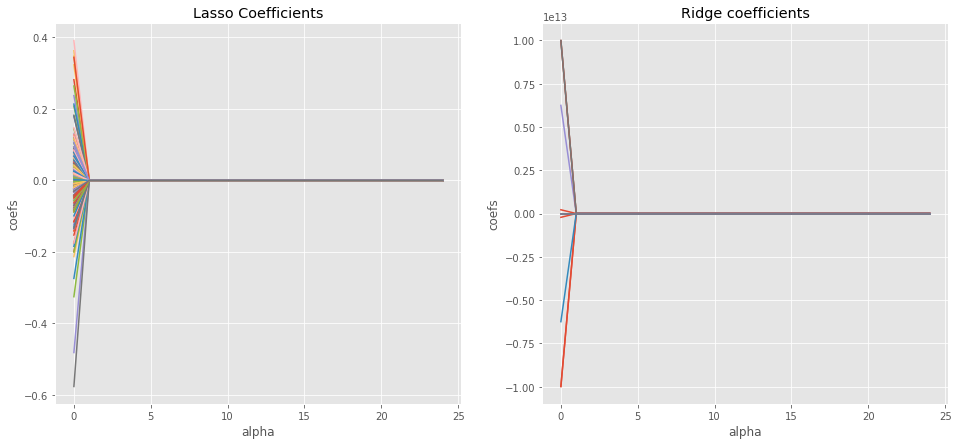

In [92]:
plt.figure(figsize = (16, 7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso Coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title("Ridge coefficients")
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [93]:
test_predicted_ols = model4.predict(df_test_encoded_2)
test_predicted_ols

0       11.634206
1       11.937252
2       12.090976
3       12.214984
4       12.304073
5       12.081064
6       12.180239
7       12.030703
8       12.230238
9       11.740811
10      12.121596
11      11.476135
12      11.410867
13      11.823351
14      11.697515
15      12.838139
16      12.466653
17      12.776862
18      12.688981
19      13.110386
20      12.808730
21      12.317683
22      12.083175
23      12.043590
24      12.226016
25      12.215356
26      12.650388
27      12.355867
28      12.163901
29      12.288220
30      12.236690
31      11.283467
32      12.206655
33      12.613776
34      12.580977
35      12.301783
36      12.103915
37      12.007509
38      11.990934
39      11.931728
40      12.015193
41      11.971634
42      12.508895
43      12.495381
44      12.330844
45      12.138973
46      12.439583
47      12.207266
48      12.063120
49      11.872102
50      11.891934
51      12.012424
52      12.006647
53      11.935810
54      12.200814
55      11

In [94]:
test_predicted_lasso = lasso.predict(df_test_encoded_2)
test_predicted_lasso

array([12.03065188, 12.03065188, 12.03065188, ..., 12.03065188,
       12.03065188, 12.03065188])

In [95]:
test_predicted_ridge = ridge.predict(df_test_encoded_2)
test_predicted_ridge

array([11.61835896, 11.92306985, 12.0564068 , ..., 12.01523483,
       11.66654679, 12.36434036])

In [96]:
test_pred = test_predicted_ridge.copy()
test_pred

array([11.61835896, 11.92306985, 12.0564068 , ..., 12.01523483,
       11.66654679, 12.36434036])

In [97]:
submission = test_original['Id']
test_pred = np.expm1(test_pred)
test_pred = pd.DataFrame(test_pred)
submission = pd.concat([submission, test_pred], axis = 1)
submission.rename({0: 'SalePrice'}, axis = 1, inplace = True)
submission.head()

,Id,SalePrice
0,1461,111118.220671
1,1462,150702.535593
2,1463,172198.127553
3,1464,196037.830253
4,1465,192129.473042


In [99]:
submission.to_csv("result.csv", index = False, header = True)